## Overview
This tutorial demonstrates how Geneweaver's tools can play a part in data science workflows realting to finding and organizin genomic data of interetst.

It loosely follows the statiscal workflow presented in section 12.5.4 in [An Introduction to Statistical Learning](https://www.statlearning.com/) with Applications in R (ISLR).

## Install Required Packages
This tutorial depends on the `geneweaver-client` library, as well as `scikit-learn`, `matplotlib`, and `scipy`. Installing `geneweaver-client` will also install the `pandas` and `numpy` packages.

If you are running this in Google CoLab, `matplotlib` and `scipy` should be pre-installed.

If you have already downloaded `geneweaver-client`, you will need to make sure you have version `0.2.0a0` or higher.


In [ ]:
!pip install geneweaver-client

In [ ]:
!pip install scikit-learn

## Initialize the Example Dataset
The `geneweaver-client` package comes with example datasets to help you get started. This tutorial will use a dataset from NCI-60 cancer dataset so as to align with the exercises found in Chapter 12.5.4 in [An Introduction to Statistical Learning](https://www.statlearning.com/) (ISLR).

In [3]:
from geneweaver.client.datasets.nci60 import DNACombinedaCGHGeneSummary

In [4]:
# Initializing the dataset will download the required data from nci.nih.gov
ds = DNACombinedaCGHGeneSummary()

In [5]:
# Use the LINKOUT attribute to get a link to the original data download page
ds.LINKOUT

'https://discover.nci.nih.gov/cellminer/loadDownload.do'

## Explore The Dataset

### Gene Identifiers
This dataset comes with both gene symbols and entrez ids as possible identifiers.

In [6]:
ds.gene_names[:5]

0        C1orf222
1          WASH7P
2           OR4F5
3       LOC729737
4    LOC100288069
Name: Gene name d, dtype: object

In [7]:
ds.entrez_ids[:5]

0       339457
1       653635
2        79501
3       729737
4    100288069
Name: Entrez gene id e, dtype: int64

### Intensity Values
Following along with Chapter 12.5.4 in [An Introduction to Statistical Learning](https://www.statlearning.com/), we can get the intensity values for the NCI-60 dataset.

This roughly matches the `nci.data <- NCI60$data` code in the ISLR text.

In [8]:
intensity = ds.intensity.transpose()

In [9]:
intensity[:10]

,0,1,2,3,4,5,6,7,8,9,...,23390,23391,23392,23393,23394,23395,23396,23397,23398,23399
BR:MCF7,-0.229,-0.229,-0.229,-0.229,-0.229,-0.229,-0.229,-0.229,-0.229,-0.229,...,0.054,0.387,-0.245,0.096,0.096,0.037,-0.071,-0.071,-0.149,-0.149
BR:MDA-MB-231,-0.181,-0.181,-0.181,-0.181,-0.181,-0.181,-0.181,-0.181,-0.181,-0.181,...,0.321,0.305,0.134,-0.253,-0.205,-0.283,-0.213,-0.213,-0.265,-0.214
BR:HS 578T,0.214,0.214,0.214,0.214,0.214,0.214,0.214,0.214,0.214,0.214,...,0.171,0.191,0.100,0.394,0.394,0.361,0.417,0.417,0.417,0.417
BR:BT-549,0.303,0.303,0.303,0.303,0.303,0.303,0.303,0.303,0.303,0.303,...,0.178,0.191,-0.100,-0.053,-0.024,-0.077,-0.022,-0.022,-0.022,0.008
BR:T-47D,-0.179,-0.179,-0.179,-0.179,-0.179,-0.179,-0.179,-0.179,-0.179,-0.179,...,0.341,0.341,0.124,-0.232,-0.207,-0.239,-0.205,-0.205,-0.205,-0.205
CNS:SF-268,0.388,0.388,0.388,0.388,0.388,0.388,0.388,0.388,0.388,0.388,...,0.359,0.388,-0.127,-0.018,-0.018,-0.142,-0.020,-0.020,-0.030,-0.030
CNS:SF-295,-0.029,-0.029,-0.029,-0.029,-0.029,-0.029,-0.029,-0.029,-0.029,-0.029,...,-0.053,-0.018,0.229,0.141,0.141,0.083,0.222,0.154,0.140,0.140
CNS:SF-539,0.363,0.363,0.363,0.363,0.363,0.363,0.363,0.363,0.363,0.363,...,0.297,0.297,-0.029,0.127,0.127,0.027,0.131,0.131,0.240,0.125
CNS:SNB-19,0.078,0.078,0.078,0.078,0.078,0.078,0.078,0.078,0.078,0.078,...,0.015,0.033,-0.236,-0.186,-0.186,-0.250,-0.100,-0.156,-0.175,-0.127
CNS:SNB-75,0.295,0.171,0.171,0.171,0.171,0.171,0.171,0.295,0.295,0.295,...,0.269,0.333,0.417,0.102,0.102,0.107,0.132,0.132,0.108,0.161


## Find Data of Interest

### Principal Components Analysis
First, let's reproduce the Principal Component Analysis as performed in [An Introduction to Statistical Learning](https://www.statlearning.com/).

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [11]:
scaler = StandardScaler()
intensity_data_scaled = scaler.fit_transform(intensity)

In [12]:
pca = PCA()
pr_out = pca.fit_transform(intensity_data_scaled)

In [13]:
components = pca.components_

In [14]:
explained_variance = pca.explained_variance_

#### Projection Plots
We reproduce here, in python, the projections of the NCI60 cancer cell lines onto the frst three principal components.

This roughly matches the R code in the ISLR text:
```
> Cols <- function(vec) {
+ cols <- rainbow(length(unique(vec)))
+ return(cols[as.numeric(as.factor(vec))])
+ }
> par(mfrow = c(1, 2))
> plot(pr.out$x[, 1:2], col = Cols(nci.labs), pch = 19,
xlab = "Z1", ylab = "Z2")
> plot(pr.out$x[, c(1, 3)], col = Cols(nci.labs), pch = 19,
xlab = "Z1", ylab = "Z3")
```

In [15]:
import numpy as np
import matplotlib.pyplot as plt

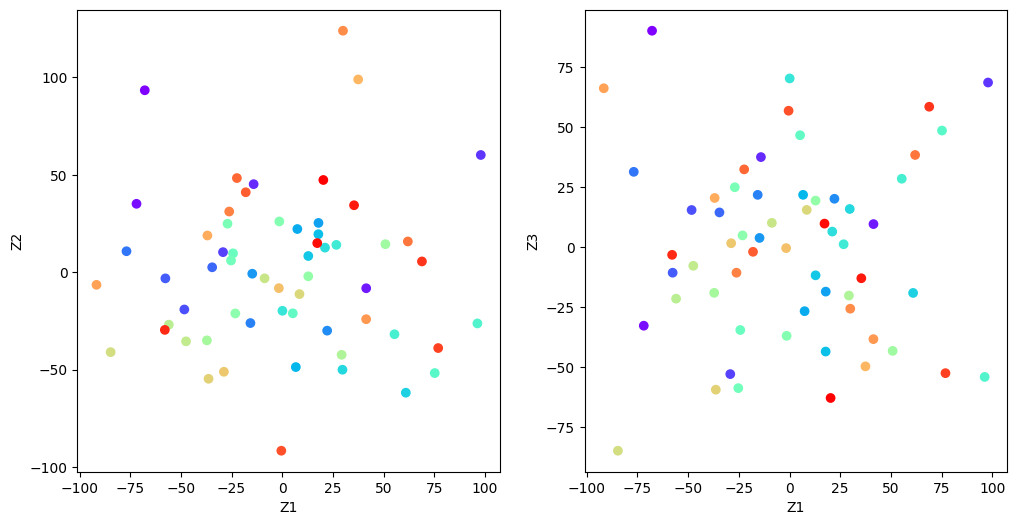

In [16]:
def cols(vec):
    # Create a rainbow color palette for the unique values
    unique_vals = np.unique(vec)
    color_palette = plt.cm.rainbow(np.linspace(0, 1, len(unique_vals)))

    # Create a dictionary to map each unique value to a color
    color_map = {val: color_palette[i] for i, val in enumerate(unique_vals)}

    # Return a list of colors corresponding to the values in vec
    return [color_map[val] for val in vec]

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# 1st plot (Z1 vs Z2)
axes[0].scatter(pr_out[:, 0], pr_out[:, 1], c=cols(intensity.index), marker='o')
axes[0].set_xlabel("Z1")
axes[0].set_ylabel("Z2")

# 2nd plot (Z1 vs Z3)
axes[1].scatter(pr_out[:, 0], pr_out[:, 2], c=cols(intensity.index), marker='o')
axes[1].set_xlabel("Z1")
axes[1].set_ylabel("Z3")

plt.show()

#### Projection Plots with Plotly
We can also use the Plotly library to easily get interactive plots. Even though these plots are fully interactive, they actually require less code than in our previous example.


In [17]:
import plotly.io as pio
import plotly.express as px
pio.templates.default = "plotly_white"
for Z in [1,2]:
    fig = px.scatter(x=pr_out[:, 0], y=pr_out[:, Z], color=intensity.index, width=600)
    fig.update_layout(xaxis_title='Z1', yaxis_title=f'Z{Z+1}')
    fig.show()

### Clustering & Linkage
We can use Scipy to perform heirarchical clustering in the same way it's presented in ISLR.

In [18]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [19]:
data_dist = pdist(intensity_data_scaled)

In [20]:
linkage_matrix = linkage(data_dist, method='complete')

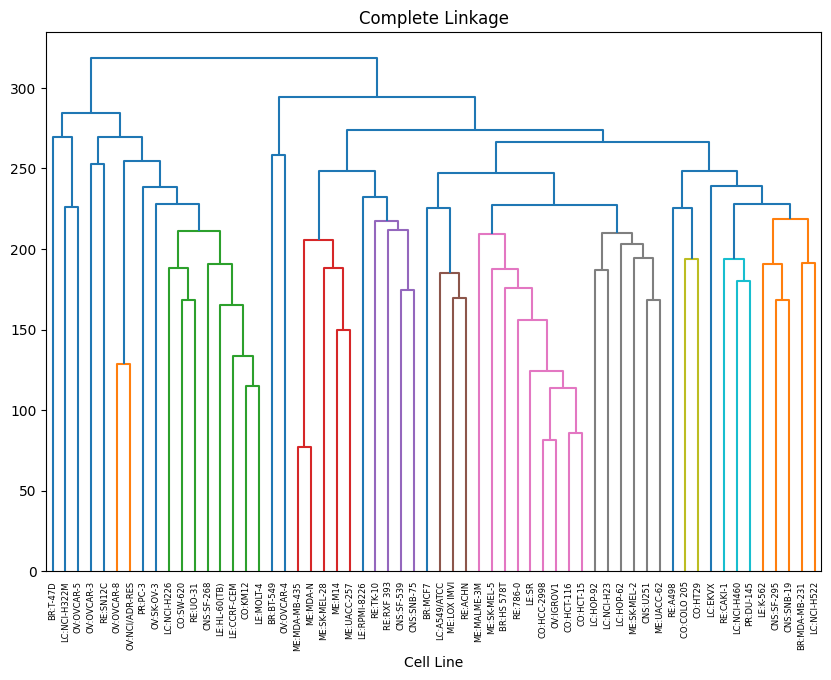

In [21]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=intensity.index.tolist())
plt.title("Complete Linkage")
plt.xlabel("Cell Line")
plt.show()

From here, we arbitrarily decide to select the top four clusters from the linkage analysis.

In [22]:
hc_clusters = cut_tree(linkage_matrix, n_clusters=4).flatten()

In [23]:
import pandas as pd

In [24]:
table = pd.crosstab(hc_clusters,
                    intensity.index.tolist(),
                    rownames=['clusters'],
                    colnames=['labels'])


In [25]:
table

labels,BR:BT-549,BR:HS 578T,BR:MCF7,BR:MDA-MB-231,BR:T-47D,CNS:SF-268,CNS:SF-295,CNS:SF-539,CNS:SNB-19,CNS:SNB-75,...,PR:DU-145,PR:PC-3,RE:786-0,RE:A498,RE:ACHN,RE:CAKI-1,RE:RXF 393,RE:SN12C,RE:TK-10,RE:UO-31
clusters,,,,,,,,,,,,,,,,,,,,,
0,0,1,1,1,0,0,1,1,1,1,...,1,0,1,1,1,1,1,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


## Filter The Dataset
Now that we've clusterd the data by cell line, we can go back and filter our original dataset to just our cluster of interest. Here we select the second (index `1`) and third (index `2`) cluster  for simplicity, since we know that they contain two and three cell lines respectively.

In [26]:
def get_columns_in_cluster(cluster_idx):
  row_values = table.loc[cluster_idx]
  columns_with_value_1 = row_values[row_values == 1]
  column_names = columns_with_value_1.index.tolist()
  return column_names

In [27]:
print(len(get_columns_in_cluster(1)))
print(len(get_columns_in_cluster(2)))

2
3


### Filter to Columns of Interest
Using the cell line labels from our earlier clustering, we can filter the intensity values to include just the cell lines of intererst (columns).

In [28]:
group_1 = ds.intensity.loc[:, get_columns_in_cluster(1)]
group_2 = ds.intensity.loc[:, get_columns_in_cluster(2)]

### Filter to Rows of Interest
We can also filter out rows (genes) that don't meet an intensity threshold, or some other criteria. Here we remove any row where each cell line doesn't have an intensity of at least 0.3.

In [29]:
min_intensity = 0.3
interest_genes_1 = group_1[group_1.gt(min_intensity).all(axis=1)]
interest_genes_2 = group_2[group_2.gt(min_intensity).all(axis=1)]

### Label The Gene Identifiers
We know that we would like to use Entrez IDs as out gene identifiers, so we add those as labels to our rows.

We could also use the gene symbols here if that were our preference, we would just replace `ds.entrez_ids` with `ds.gene_names`.

In [30]:
interest_genes_1.index = ds.entrez_ids[interest_genes_1.index]
interest_genes_2.index = ds.entrez_ids[interest_genes_2.index]

In [31]:
interest_genes_1.index

Int64Index([     3158,     83998,    343505,     11085,      4853,    653820,
               337875,      2210,    647121, 100874392,
            ...
                26953,     90865,     89882,    115426,      2731,         0,
                    0,         0,         0,         0],
           dtype='int64', name='Entrez gene id e', length=268)

### Remove Rows Without Identifiers
Some of the NCI-60 rows don't have identifiers, which are required for use with Geneweaver, so we remove these now.

In [32]:
interest_genes_1

,BR:BT-549,OV:OVCAR-4
Entrez gene id e,,
3158,0.323,0.370
83998,0.323,0.370
343505,0.323,0.370
11085,0.323,0.370
4853,0.323,0.370
...,...,...
0,0.323,0.370
0,0.617,0.550
0,0.626,0.565


In [33]:
# Remove Rows Without a Gene Identifier
interest_genes_1 = interest_genes_1.drop(0, errors="ignore")
interest_genes_2 = interest_genes_2.drop(0, errors="ignore")

In [34]:
interest_genes_1

,BR:BT-549,OV:OVCAR-4
Entrez gene id e,,
3158,0.323,0.370
83998,0.323,0.370
343505,0.323,0.370
11085,0.323,0.370
4853,0.323,0.370
...,...,...
26953,0.432,0.308
90865,0.432,0.308
89882,0.432,0.308


## Run a Genweaver Tool Locally
Geneweaver provides a number of analysis tools that can be run through the website, but you may want to use one to preprocess you dataset before uploading it.

We will use Geneweaver's Boolean Algebra tool to find an interesting intersection between two clusters.

First, let's install the Geneweaver Boolean Algebra tool.

In [ ]:
!pip install geneweaver-boolean-algebra

In [36]:
from geneweaver.tools.boolean_algebra import (
    BooleanAlgebra,
    BooleanAlgebraType,
    BooleanAlgebraInput
)
from geneweaver.core.schema.gene import GeneValue
from geneweaver.core import parse
boolean = BooleanAlgebra()

In [37]:
gene_values_1 = parse.iterable.to_gene_value_list_binary(interest_genes_1.index)
gene_values_2 = parse.iterable.to_gene_value_list_binary(interest_genes_2.index)

In [38]:
result = boolean.run(BooleanAlgebraInput(
    type=BooleanAlgebraType.INTERSECTION,
    input_genesets=[gene_values_1, gene_values_2]
))

In [39]:
geneset_values = list(result.result[(0,1)])

## Upload Data to Geneweaver
Now that we've identified genes of interest, we can upload them to Geneweaver. This will allow us to explore how our data relates to data in both in the Geneweaver application and in related resources, will allow us to use Geneweaver's integrated toolsets, and provides us an easy way to save, track and organize our data for later use.

First, let's login so that the application can keep track of our work for us. The `geneweaver-client` package can help us with this process, even if we've don't have an account yet.

In [40]:
# Import the login and acces token functions.
from geneweaver.client.auth import login, get_access_token

In [41]:
# Run the login function and follow the link in the output.
# Confirm that the code matches the output here,
# then sign-up or login.
login()
# Wait for the "Authenticated!" message, then continue.

1. On your computer or mobile device navigate to:  https://geneweaver.auth0.com/activate?user_code=SWZW-VPNB
2. Enter the following code:  SWZW-VPNB
Authenticated!
- Id Token: eyJhbGciOi...


In [42]:
from geneweaver.core.schema.gene import GeneValue
from geneweaver.core.schema.geneset import GenesetUpload
from geneweaver.core.enum import GenesetScoreType, GenesetAccess

In [43]:
# Create a GenesetUpload object
geneset = GenesetUpload(
    name="My NCI-60 Dataset",
    label="",
    score_type=GenesetScoreType.BINARY,
    description="A dataset I created from the NCI-60 Cancer Data.",
    pubmed_id=None,
    access=GenesetAccess.PRIVATE,
    species='human',
    gene_identifier='entrez',
    gene_list=geneset_values
)

In [44]:
from geneweaver.client.api.v3 import genesets as geneset_api

In [45]:
# After logging in, the get_access_token() function will retrieve an
# API token for you to use
#
# geneset_id = geneset_api.upload(get_access_token(), geneset)
#
# Except this API is currently under construction, so we'll need to use
# the web interface

### Manually Upload the Geneset
To manually upload the geneset, we will render the values we have into a string that can be entered on Geneweaver's [Uplaod Geneset page](https://geneweaver.org/uploadgeneset).

In [46]:
from geneweaver.core.render.gene_list import gene_list_str

Once you run the function below, copy the output and the head over to https://geneweaver.org/.

In [47]:
gene_list_str(geneset_values)

'54512\t1.0\n203054\t1.0\n9684\t1.0\n28991\t1.0\n2843\t1.0\n100126351\t1.0\n93100\t1.0\n50626\t1.0\n1537\t1.0\n90990\t1.0\n51337\t1.0\n286075\t1.0\n100130274\t1.0\n642658\t1.0\n79581\t1.0\n575\t1.0\n8629\t1.0\n113655\t1.0\n340371\t1.0\n340385\t1.0\n22827\t1.0\n1936\t1.0\n375686\t1.0\n4796\t1.0\n2765\t1.0\n3297\t1.0\n9831\t1.0\n727957\t1.0\n58500\t1.0\n79943\t1.0\n137797\t1.0\n26873\t1.0\n5339\t1.0\n340390\t1.0\n79792\t1.0\n116447\t1.0\n389692\t1.0\n340393\t1.0\n23246\t1.0\n55630\t1.0\n286128\t1.0\n286103\t1.0\n286122\t1.0\n619434\t1.0\n225689\t1.0\n80778\t1.0\n2907\t1.0\n731779\t1.0\n54108\t1.0\n23237\t1.0\n84232\t1.0\n7564\t1.0\n57152\t1.0\n83481\t1.0\n286101\t1.0\n1584\t1.0\n83696\t1.0\n23513\t1.0\n8581\t1.0\n22898\t1.0\n57210\t1.0\n90987\t1.0\n78998\t1.0\n29894\t1.0\n389690\t1.0\n23144\t1.0\n7264\t1.0\n286077\t1.0\n54742\t1.0\n51160\t1.0\n441381\t1.0\n8733\t1.0\n100126338\t1.0\n8694\t1.0\n286102\t1.0\n100133669\t1.0\n51236\t1.0\n7553\t1.0\n414919\t1.0\n100616268\t1.0\n100616318\t1.0

### Geneweaver.org Instructions

1) You will need to login if you haven't already.

2) Head over to the "Upload GeneSet" page, found in the "Magage GeneSets" menu on the top right of the page.

3) Once there, fill out the form, and remeber that we're dealing with data from
human beings (aka "Homo Sapiens"), and decided ealier to use the "Entrez" as
our Gene Identifier type.
  - If you instead used the "gene_names" attribute of the dataset, you would select "Gene Symbol" as you Gene Identifiers type.

4) Finally, paste the string value from the gene_list_str function we ran above,
and click the "Review GeneSet Upload" to submit the dataset to Geneweaver for
processing.